In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import array as arr
from numpy.linalg import matrix_rank

In [35]:
def oned2twodfilter(filter):
    #Check rank
    if matrix_rank(filter) != 1:
        return None
    else:
        U, S, V = np.linalg.svd(filter)
        h1 = U[:,0] * np.sqrt(S[0])
        h2 = V[0] * np.sqrt(S[0])
        return h1,h2

I = np.array([[1, 2, 3],
              [2, 4, 6],
              [3, 6, 9]])

f1, f2 = oned2twodfilter(I)
print(I,f1,f2)

[[1 2 3]
 [2 4 6]
 [3 6 9]] [-1. -2. -3.] [-1. -2. -3.]


In [46]:
I = np.array([[1, 2, 3],
              [2, 4, 6],
              [3, 6, 9]])

U, S, V = np.linalg.svd(I)

print(S)
print(S[0])

[1.40000000e+01 1.30016008e-15 0.00000000e+00]
14.000000000000002


(<AxesSubplot:title={'center':'seperable 2D Filter'}>,
 (-0.5, 299.5, 249.5, -0.5),
 Text(0.5, 1.0, 'seperable 2D Filter'))

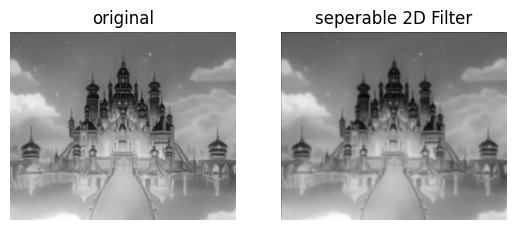

In [6]:
# Seperate 2D filter to 1D
def seperable2D(img, c, r):
    new = img
    (a,b) = (c*r).shape
    pad = np.int8((a-1)/2)
    (x,y) = img.shape
    padding = np.pad(img, [(pad, pad),(pad, pad)], mode='constant')
    c = c/np.sum(c)
    r = r/np.sum(r)
    for i in range(x-a):
        for j in range(y-b):
            img_cov = padding[i:i+a, j:j+b]
            int = np.matmul(img_cov,c)
            int = np.matmul(r,int)
            new[i,j] = int[0]
    return new

column = np.array([[1],
                   [2],
                   [3]])

row    = np.array([1,2,3])

img = plt.imread('castle.jpg')
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.subplot(1,2,1), plt.imshow(gray, cmap='gray'), plt.axis('off'), plt.title('original')
plt.subplot(1,2,2), plt.imshow(seperable2D(gray, column, row), cmap='gray'), plt.axis('off'), plt.title('seperable 2D Filter')

(<AxesSubplot:title={'center':'Max filter'}>,
 (-0.5, 282.5, 280.5, -0.5),
 Text(0.5, 1.0, 'Max filter'))

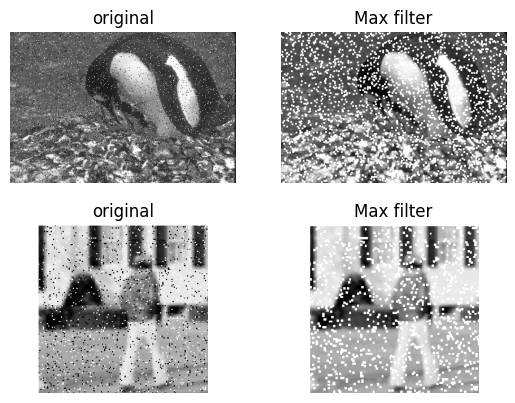

In [7]:
def max_filter(img, size):
    new = img
    s = size
    (x,y) = img.shape
    pad = np.int8((s-1)/2)
    padding = np.pad(img, [(pad, pad),(pad, pad)], mode='constant')
    for i in range(x):
        for j in range(y):
            img_cov = padding[i:i+s, j:j+s]
            new[i,j] = np.max(img_cov)
    return new

img1 = plt.imread('SaltAndPepper1.png')

img2 = plt.imread('SaltAndPepper2.png')
gray2 = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)

plt.subplot(2,2,1), plt.imshow(img1, cmap='gray'), plt.axis('off'), plt.title('original')
plt.subplot(2,2,2), plt.imshow(max_filter(img1, 3), cmap='gray'), plt.axis('off'), plt.title('Max filter')
plt.subplot(2,2,3), plt.imshow(gray2, cmap='gray'), plt.axis('off'), plt.title('original')
plt.subplot(2,2,4), plt.imshow(max_filter(gray2, 3), cmap='gray'), plt.axis('off'), plt.title('Max filter')

(<AxesSubplot:title={'center':'Min filter'}>,
 (-0.5, 282.5, 280.5, -0.5),
 Text(0.5, 1.0, 'Min filter'))

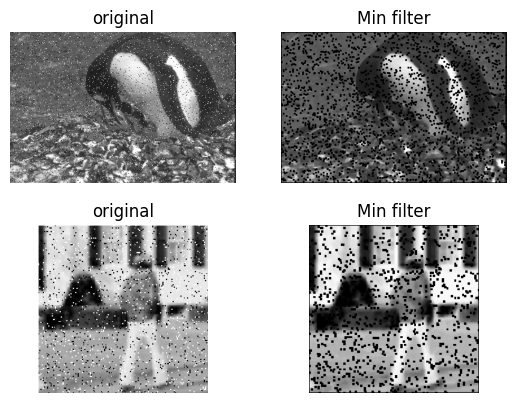

In [8]:
def min_filter(img, size):
    new = img
    s = size
    (x,y) = img.shape
    pad = np.int8((s-1)/2)
    padding = np.pad(img, [(pad, pad),(pad, pad)], mode='constant')
    for i in range(x):
        for j in range(y):
            img_cov = padding[i:i+s, j:j+s]
            new[i,j] = np.min(img_cov)
    return new

img1 = plt.imread('SaltAndPepper1.png')

img2 = plt.imread('SaltAndPepper2.png')
gray2 = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)

plt.subplot(2,2,1), plt.imshow(img1, cmap='gray'), plt.axis('off'), plt.title('original')
plt.subplot(2,2,2), plt.imshow(min_filter(img1, 3), cmap='gray'), plt.axis('off'), plt.title('Min filter')
plt.subplot(2,2,3), plt.imshow(gray2, cmap='gray'), plt.axis('off'), plt.title('original')
plt.subplot(2,2,4), plt.imshow(min_filter(gray2, 3), cmap='gray'), plt.axis('off'), plt.title('Min filter')

(<AxesSubplot:title={'center':'Median filter'}>,
 (-0.5, 282.5, 280.5, -0.5),
 Text(0.5, 1.0, 'Median filter'))

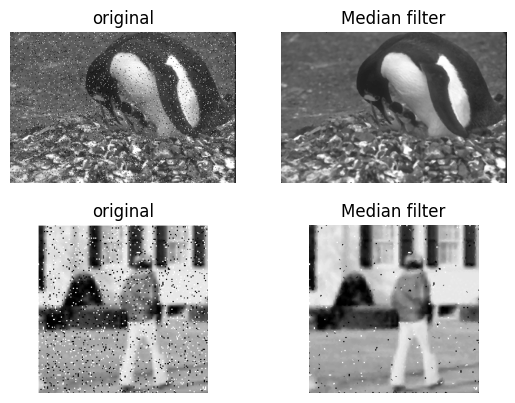

In [9]:
def median_filter(img, size):
    new = img
    s = size
    (x,y) = img.shape
    pad = np.int8((s-1)/2)
    padding = np.pad(img, [(pad, pad),(pad, pad)], mode='constant')
    for i in range(x):
        for j in range(y):
            img_cov = padding[i:i+s, j:j+s]
            new[i,j] = np.median(img_cov)
    return new

img1 = plt.imread('SaltAndPepper1.png')

img2 = plt.imread('SaltAndPepper2.png')
gray2 = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)

plt.subplot(2,2,1), plt.imshow(img1, cmap='gray'), plt.axis('off'), plt.title('original')
plt.subplot(2,2,2), plt.imshow(median_filter(img1, 3), cmap='gray'), plt.axis('off'), plt.title('Median filter')
plt.subplot(2,2,3), plt.imshow(gray2, cmap='gray'), plt.axis('off'), plt.title('original')
plt.subplot(2,2,4), plt.imshow(median_filter(gray2, 3), cmap='gray'), plt.axis('off'), plt.title('Median filter')

(<AxesSubplot:title={'center':'Weighted Median filter'}>,
 (-0.5, 282.5, 280.5, -0.5),
 Text(0.5, 1.0, 'Weighted Median filter'))

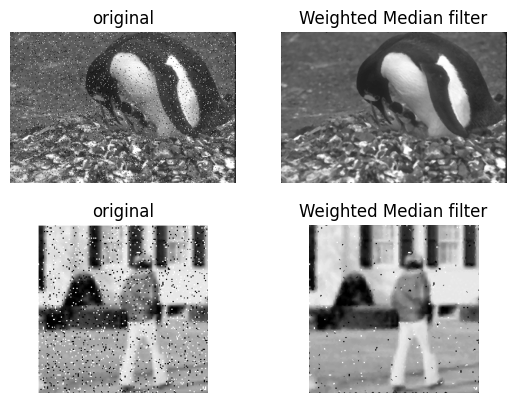

In [39]:
def weighted_median_filter(img, weight):
    (a,b) = weight.shape
    weight = weight.ravel()
    pad = np.int8((a-1)/2)
    new = img
    sum_w = np.sum(w)
    (x,y) = img.shape
    padding = np.pad(img, [(pad, pad),(pad, pad)], mode='constant')
    for i in range(x):
        for j in range(y):
            img_cov = padding[i:i+a, j:j+a]
            img_cov = img_cov.ravel()
            weighted = []
            for m in range(len(weight)):
                for n in range(weight[m]):
                    weighted.append(img_cov[m])
            new[i,j] = np.median(weighted)
    return new

img1 = plt.imread('SaltAndPepper1.png')

img2 = plt.imread('SaltAndPepper2.png')
gray2 = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)

w = np.array([[2, 1, 2],
              [1, 2, 1],
              [2, 1, 2]])

plt.subplot(2,2,1), plt.imshow(img1, cmap='gray'), plt.axis('off'), plt.title('original')
plt.subplot(2,2,2), plt.imshow(weighted_median_filter(img1, w), cmap='gray'), plt.axis('off'), plt.title('Weighted Median filter')
plt.subplot(2,2,3), plt.imshow(gray2, cmap='gray'), plt.axis('off'), plt.title('original')
plt.subplot(2,2,4), plt.imshow(weighted_median_filter(gray2, w), cmap='gray'), plt.axis('off'), plt.title('Weighted Median filter')